In [1]:
# Next steps....need 93% accuracy
# 1. more eipcs
# 2. Longer classification head
# 3. 2 or 3 more convultional layers - image size, layers, 
# 4. Pre-process - 
# Setting up MNST, this should look familiar:
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout
from keras.utils import to_categorical

# For examining results
from sklearn.metrics import confusion_matrix
import seaborn as sn

num_classes = 10 
image_size = 784

(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

Using TensorFlow backend.


In [2]:
conv_training_data = training_images.reshape(60000, 28, 28, 1)
conv_test_data = test_images.reshape(10000, 28, 28, 1)

In [3]:
def plot_training_history(history, model, eval_images=False):
    figure = plt.figure()

    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    figure.tight_layout()
    plt.show()
    
    if eval_images:
        loss, accuracy  = model.evaluate(conv_test_data, test_labels, verbose=False)
    else:
        loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
        
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 36s 675us/step - loss: 1.3253 - acc: 0.7493 - val_loss: 0.3679 - val_acc: 0.8645
Epoch 2/5
54000/54000 [==============================] - 35s 656us/step - loss: 0.3683 - acc: 0.8705 - val_loss: 0.3054 - val_acc: 0.8893
Epoch 3/5
54000/54000 [==============================] - 35s 654us/step - loss: 0.3122 - acc: 0.8890 - val_loss: 0.2988 - val_acc: 0.8942
Epoch 4/5
54000/54000 [==============================] - 35s 657us/step - loss: 0.2767 - acc: 0.9005 - val_loss: 0.2732 - val_acc: 0.9022
Epoch 5/5
54000/54000 [==============================] - 36s 659us/step - loss: 0.2536 - acc: 0.9093 - val_loss: 0.2642 - val_acc: 0.9047


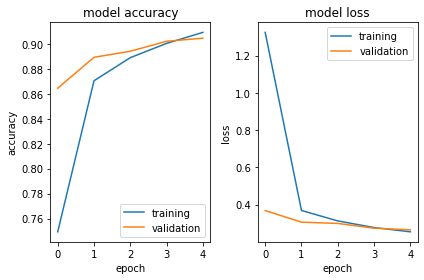

Test loss: 0.279
Test accuracy: 0.905


In [4]:
# Added third layer to ANN head
model = Sequential()

# Note, fewer filters and a bigger kernel, plus a pooling layer
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Note, more filters and a pooling
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2 dense layers with dropout before the final.
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(126, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(conv_training_data, training_labels, batch_size=128, epochs=5, verbose=True, validation_split=.1)

plot_training_history(history, model, eval_images=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 30s 549us/step - loss: 0.7821 - acc: 0.7688 - val_loss: 0.3486 - val_acc: 0.8665
Epoch 2/5
54000/54000 [==============================] - 28s 527us/step - loss: 0.3828 - acc: 0.8645 - val_loss: 0.3221 - val_acc: 0.8793
Epoch 3/5
54000/54000 [==============================] - 28s 511us/step - loss: 0.3281 - acc: 0.8821 - val_loss: 0.2970 - val_acc: 0.8863
Epoch 4/5
54000/54000 [==============================] - 28s 520us/step - loss: 0.2916 - acc: 0.8949 - val_loss: 0.2835 - val_acc: 0.8980
Epoch 5/5
54000/54000 [==============================] - 28s 522us/step - loss: 0.2707 - acc: 0.9021 - val_loss: 0.2715 - val_acc: 0.8978


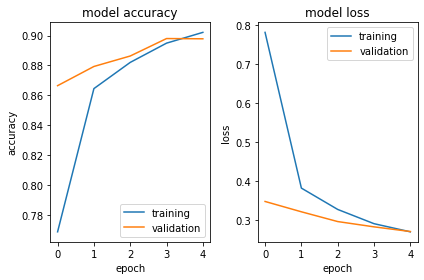

Test loss: 0.29
Test accuracy: 0.897


In [5]:
# Reduced 2nd CNN filter to 32
# Slightly reduced accuracy, slightly less overfitting
####....tried more CNN filters, 32 -> 64, etc ????
# Added 3rd CNN layer
# Tried 3rd CNN layer w/out pooling, didnt work
# currently,2 X 32 CNN filters seems to work.
## switch pooling to striding?
# increase epics!

model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(126, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(conv_training_data, training_labels, batch_size=128, epochs=5, verbose=True, validation_split=.1)

plot_training_history(history, model, eval_images=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 36s 673us/step - loss: 1.2319 - acc: 0.7597 - val_loss: 0.3856 - val_acc: 0.8582
Epoch 2/5
54000/54000 [==============================] - 37s 684us/step - loss: 0.3647 - acc: 0.8739 - val_loss: 0.3073 - val_acc: 0.8903
Epoch 3/5
54000/54000 [==============================] - 37s 689us/step - loss: 0.3051 - acc: 0.8904 - val_loss: 0.3126 - val_acc: 0.8888
Epoch 4/5
54000/54000 [==============================] - 36s 666us/step - loss: 0.2687 - acc: 0.9033 - val_loss: 0.2971 - val_acc: 0.8970
Epoch 5/5
54000/54000 [==============================] - 37s 684us/step - loss: 0.2377 - acc: 0.9129 - val_loss: 0.2814 - val_acc: 0.9033


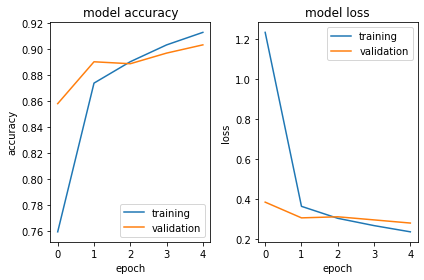

Test loss: 0.3
Test accuracy: 0.901


In [6]:
## currently,2 X 32 CNN filters seems to work.
## switch pooling to striding?
# increase epics...
# removed striding from 2nd filter
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(126, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(conv_training_data, training_labels, batch_size=128, epochs=5, verbose=True, validation_split=.1)

plot_training_history(history, model, eval_images=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 26s 478us/step - loss: 0.7179 - acc: 0.7856 - val_loss: 0.3397 - val_acc: 0.8738
Epoch 2/5
54000/54000 [==============================] - 25s 465us/step - loss: 0.3655 - acc: 0.8711 - val_loss: 0.2953 - val_acc: 0.8900
Epoch 3/5
54000/54000 [==============================] - 25s 464us/step - loss: 0.3069 - acc: 0.8915 - val_loss: 0.2864 - val_acc: 0.8968
Epoch 4/5
54000/54000 [==============================] - 25s 465us/step - loss: 0.2752 - acc: 0.9007 - val_loss: 0.2775 - val_acc: 0.8995
Epoch 5/5
54000/54000 [==============================] - 25s 470us/step - loss: 0.2430 - acc: 0.9111 - val_loss: 0.2826 - val_acc: 0.9013


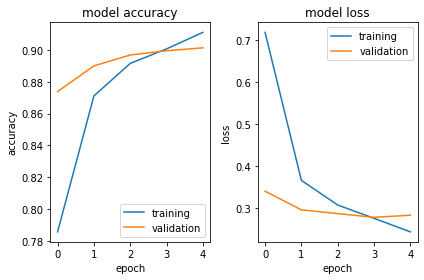

Test loss: 0.306
Test accuracy: 0.895


In [10]:
# Best model reached 0.905 w/ 30 sec run time.
# used best model w/ 3rd CNN filter, didnt work.
# Tried more epochs didnt work.
# stride instead of maxpool didnt work.
###test all optimizers and loss next.
#####then, optimize ANN head.
#######finally, data augmentation

model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(64, kernel_size=(3, 3), strides=(2,2), activation='relu', padding='same'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(126, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(conv_training_data, training_labels, batch_size=128, epochs=5, verbose=True, validation_split=.1)

plot_training_history(history, model, eval_images=True)